<h1>Task 1: Data dimensionality, distance-based classifiers</h1>
<p>The purpose of this task is to develop some intuitions about clouds of points in high-dimensional spaces. In particular, you are supposed to use dimensionality reduction techniques to visualize your data, develop a very simple algorithm for classifying hand-written digits and compare it to another distance-based classifier.</p>

<p>1. For each digit d, d = 0,1,...,9, let us consider a cloud of points in 256 dimensional space, Cd, which consists of all training images (vectors) that represent d. For each cloud Cd we can calculate its center, cd, which is just a 256-dimensional vector of means over all coordinates of vectors that belong to Cd. Once we have these centers, we can easily classify new images: by calculating the distance from the vector that represents this image to each of the 10 centers, the closest center defines the label of the image. Next, calculate the distances between the centers of the 10 clouds, distij = dist(ci,cj), for i,j = 0,1,...9. Given all these distances, try to say something about the expected accuracy of your classifier. What pairs of digits seem to be most difficult to separate?</p>

In [ ]:
import pandas as pd
import numpy as np

test_in = pd.read_csv('test_in.csv')
test_out = pd.read_csv('test_out.csv')
train_in = pd.read_csv('train_in.csv')
train_out = pd.read_csv('train_out.csv')

print(train_in)

       -1  -1.1  -1.2   -1.3   -1.4  ...  -0.991  -1.121  -1.122  -1.123  -1.124
0    -1.0  -1.0  -1.0 -0.813 -0.671  ...   0.126  -0.095  -0.671  -0.828    -1.0
1    -1.0  -1.0  -1.0 -1.000 -1.000  ...  -0.179  -1.000  -1.000  -1.000    -1.0
2    -1.0  -1.0  -1.0 -1.000 -1.000  ...  -1.000  -1.000  -1.000  -1.000    -1.0
3    -1.0  -1.0  -1.0 -1.000 -1.000  ...   0.439  -0.199  -0.883  -1.000    -1.0
4    -1.0  -1.0  -1.0 -1.000 -1.000  ...  -1.000  -1.000  -1.000  -1.000    -1.0
...   ...   ...   ...    ...    ...  ...     ...     ...     ...     ...     ...
1701 -1.0  -1.0  -1.0 -1.000 -1.000  ...  -0.974  -1.000  -1.000  -1.000    -1.0
1702 -1.0  -1.0  -1.0 -1.000 -1.000  ...  -1.000  -1.000  -1.000  -1.000    -1.0
1703 -1.0  -1.0  -1.0 -1.000 -0.948  ...  -1.000  -1.000  -1.000  -1.000    -1.0
1704 -1.0  -1.0  -1.0 -1.000 -1.000  ...  -1.000  -1.000  -1.000  -1.000    -1.0
1705 -1.0  -1.0  -1.0 -1.000 -0.338  ...  -1.000  -1.000  -1.000  -1.000    -1.0

[1706 rows x 256 columns]


In [ ]:
def get_centers(train_in_arr, train_out_arr):
  """
  Obtains dictionary of centers, when given an array of input data and one of output data.

  train_in_arr = array [number of points][number of dimensions] of example points
  train_out_arr = array [number of points][1] of labels of example points

  Returns:
  centers = dictionary with labels as keys and vectors of the coordinates of the centers as values
  """

  n = len(train_in_arr) # number of records
  d = {0 : [], 1 : [], 2 : [], 3 : [], 4 : [], 5 : [], 6 : [], 7 : [], 8 : [], 9 : []} # label of the class : array of points belonging to it

  # Add points to d according to their label
  for i in range(n):
    label = train_out_arr[i][0]
    d[label].append(train_in_arr[i])

  centers = {0 : [], 1 : [], 2 : [], 3 : [], 4 : [], 5 : [], 6 : [], 7 : [], 8 : [], 9 : []} # dictionary for centers (cd)

  # Calculate the center (cd) coordinates for each class
  for i in range(10):
    instances = len(d[i]) # number of examples for label i in d
    sum = [] # vector of sums for each coordinate

    for j in range(256): #for each coordinate
      sum.append(0)
      for k in range(instances): # for each example
        sum[j] += d[i][k][j]

    # Divide coordinate sums by their number to make an average
    for j in range(256):
      centers[i].append(sum[j]/instances)

  return centers

In [ ]:
# Obtain the dictionary of centers

# Save the data as arrays for simplicity
train_in_arr = train_in.to_numpy()
train_out_arr = train_out.to_numpy()

centers = get_centers(train_in_arr, train_out_arr)
print(centers)

{0: [-1.0, -0.9975235109717869, -0.9870031347962384, -0.9459184952978056, -0.8440438871473355, -0.6049905956112853, -0.14162068965517235, 0.16136050156739812, 0.08225078369905955, -0.34288714733542336, -0.753366771159875, -0.9370438871473351, -0.9943166144200626, -0.9996238244514106, -1.0, -1.0, -1.0, -0.9964482758620689, -0.9573228840125391, -0.8273761755485894, -0.5384545454545454, 0.013736677115987469, 0.5058808777429468, 0.6842319749216303, 0.6429153605015675, 0.40327586206896554, -0.043877742946708466, -0.5863322884012537, -0.8896990595611286, -0.9831285266457682, -0.9978777429467084, -1.0, -1.0, -0.9743981191222568, -0.8572664576802509, -0.6046990595611283, -0.09220689655172414, 0.45669905956112866, 0.698780564263323, 0.6892727272727271, 0.5825705329153607, 0.5507648902821319, 0.4056583072100314, -0.054836990595611236, -0.5533981191222571, -0.8795109717868339, -0.9839843260188088, -0.9971128526645768, -0.9924576802507837, -0.9076394984326019, -0.688758620689655, -0.21858934169278

In [ ]:
from math import sqrt

def class_distances(centers):
  """
    Calculates the distance between each pair of class centers.

    centers = dictionary with labels as keys and vectors of the coordinates of the centers as values

    Returns:
    distances = square matrix of distances between centers
  """

  distances = []

  for i in range(10):
    distances.append([])

    for j in range(10):
      sum = 0
      for coordinate in range(256):
        sum += (centers[i][coordinate] - centers[j][coordinate])**2
      distances[i].append(sqrt(sum)) # add the Euclidean distance between centers i and j to the distances matrix

  return distances

In [ ]:
center_distances = class_distances(centers)

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(pd.DataFrame(center_distances))

           0          1          2          3          4          5  \
0   0.000000  14.449608   9.334556   9.143734  10.769844   7.519296   
1  14.449608   0.000000  10.125323  11.733233  10.173786  11.118800   
2   9.334556  10.125323   0.000000   8.178285   7.932541   7.906796   
3   9.143734  11.733233   8.178285   0.000000   9.087608   6.118750   
4  10.769844  10.173786   7.932541   9.087608   0.000000   8.001517   
5   7.519296  11.118800   7.906796   6.118750   8.001517   0.000000   
6   8.163019  10.597933   7.317952   9.292426   8.765997   6.688629   
7  11.864555  10.743154   8.872531   8.922401   7.583012   9.211954   
8   9.907902  10.086777   7.077516   7.020425   7.380909   6.967386   
9  11.488875   9.932094   8.887748   8.354350   6.010408   8.258538   

           6          7          8          9  
0   8.163019  11.864555   9.907902  11.488875  
1  10.597933  10.743154  10.086777   9.932094  
2   7.317952   8.872531   7.077516   8.887748  
3   9.292426   8.922401   

<h4>Conclusions</h4>
<p>According to the matrix of distances between centers, this method distinguishes better between certain pairs of digits than others. Some of the difficult digit pairs are the following: 7 and 9, 4 and 9, 3 and 5, 5 and 6, 5 and 8, and 8 and 9. We can expect a higher accuracy when distinguishing between classes whose centers are further apart, for example: 0 and 1, 0 and 7, 0 and 9, 1 and 3, and 1 and 5.

<p>2. Experiment with three dimensionality reduction algorithms: PCA, LLE, t-SNE and apply them to the MNIST data to generate a visualization of the different classes, preferably in 2D. You are free to use any library to do this, however sklearn contains all the necessary methods.</p>
<p>Does the visualization agree with your intuitions and the between-class distance matrix dist_ij?</p>

explained variance ratio (first two components): [0.19315109 0.09219318]


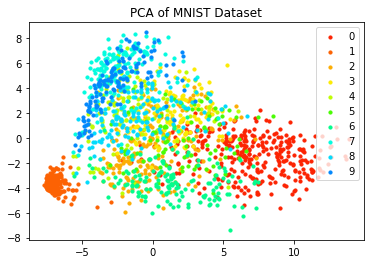

In [ ]:
# PCA (Principal Component Analysis)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(1)

# A 2D representation is wanted, so we will keep the two components with most variance
# A random state is given for reproducible results
pca = PCA(n_components=2, random_state=1)
X = pca.fit(train_in_arr).transform(train_in_arr)
y = train_out_arr.T[0]
# Percentage of variance explained for each components
print("explained variance ratio (first two components):", pca.explained_variance_ratio_)

plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 10, c = '#fc2403', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 10, c = '#fc6203', label = '1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 10, c = '#fcad03', label = '2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 10, c = '#fceb03', label = '3')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 10, c = '#befc03', label = '4')
plt.scatter(X[y == 5, 0], X[y == 5, 1], s = 10, c = '#4afc03', label = '5')
plt.scatter(X[y == 6, 0], X[y == 6, 1], s = 10, c = '#03fc8c', label = '6')
plt.scatter(X[y == 7, 0], X[y == 7, 1], s = 10, c = '#03fcdf', label = '7')
plt.scatter(X[y == 8, 0], X[y == 8, 1], s = 10, c = '#03dbfc', label = '8')
plt.scatter(X[y == 9, 0], X[y == 9, 1], s = 10, c = '#0388fc', label = '9')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MNIST Dataset')
plt.show()

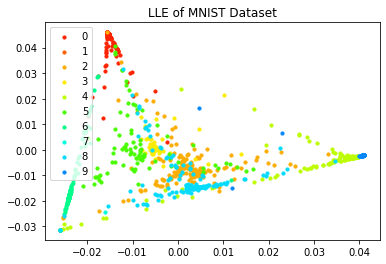

In [ ]:
# LLE (Locally Linear Embedding)

from sklearn.manifold import LocallyLinearEmbedding

# A 2D representation is wanted, so we will keep the two components with most variance
embedding = LocallyLinearEmbedding(n_components=2)
X = embedding.fit_transform(train_in_arr)

plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 10, c = '#fc2403', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 10, c = '#fc6203', label = '1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 10, c = '#fcad03', label = '2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 10, c = '#fceb03', label = '3')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 10, c = '#befc03', label = '4')
plt.scatter(X[y == 5, 0], X[y == 5, 1], s = 10, c = '#4afc03', label = '5')
plt.scatter(X[y == 6, 0], X[y == 6, 1], s = 10, c = '#03fc8c', label = '6')
plt.scatter(X[y == 7, 0], X[y == 7, 1], s = 10, c = '#03fcdf', label = '7')
plt.scatter(X[y == 8, 0], X[y == 8, 1], s = 10, c = '#03dbfc', label = '8')
plt.scatter(X[y == 9, 0], X[y == 9, 1], s = 10, c = '#0388fc', label = '9')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LLE of MNIST Dataset')
plt.show()

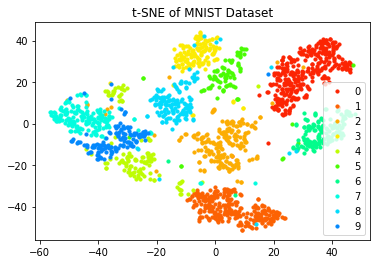

In [ ]:
# t-SNE (T-distributed Stochastic Neighbor Embedding)

from sklearn.manifold import TSNE

# A 2D representation is wanted, so we will keep the two components with most variance
emb = TSNE(n_components=2, learning_rate='auto', init='random')
X = emb.fit_transform(np.asarray(train_in, dtype='float32'))

plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 10, c = '#fc2403', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 10, c = '#fc6203', label = '1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 10, c = '#fcad03', label = '2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 10, c = '#fceb03', label = '3')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 10, c = '#befc03', label = '4')
plt.scatter(X[y == 5, 0], X[y == 5, 1], s = 10, c = '#4afc03', label = '5')
plt.scatter(X[y == 6, 0], X[y == 6, 1], s = 10, c = '#03fc8c', label = '6')
plt.scatter(X[y == 7, 0], X[y == 7, 1], s = 10, c = '#03fcdf', label = '7')
plt.scatter(X[y == 8, 0], X[y == 8, 1], s = 10, c = '#03dbfc', label = '8')
plt.scatter(X[y == 9, 0], X[y == 9, 1], s = 10, c = '#0388fc', label = '9')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE of MNIST Dataset')
plt.show()

3. Implement the simplest distance-based classifier that is described in part 1. Apply your classifier to
all points from the training set and calculate the percentage of correctly classified digits. Do the same
with the test set, using the centers that were calculated from the training set.

In [ ]:
from math import sqrt

def classify(point, centers):
  """
  Classifies a given point according to the known centers.

  point = vector of coordinates representing instance to be classified
  centers = dictionary with labels as keys and vectors of the coordinates of the centers as values

  Returns:
  label_min = the label of the class whose center is closest
  """

  sum = [] # sums of squared differences between coordinate so of the point and coordinates of each center

  for i in range(10): # for each class
    temp_sum = 0
    
    for j in range(256): # for each coordinate
      temp_sum += (point[j] - centers[i][j])**2

    sum.append(temp_sum)

  # Calculating the Euclidian distance from the point to each center
  distance = []
  for i in range(10):
    distance.append(sqrt(sum[i]))

  # Initialize the min distance as the first distance and the min label as 0
  min = distance[0]
  label_min = 0

  # Parse the matrix and search for the minimum
  for i in range(len(distance)):
    if distance[i] < min:
      min = distance[i]
      label_min = i

  return label_min

In [ ]:
# Evaluate the train instances and calculate the percentage of correct results

from sklearn.metrics import accuracy_score

total = len(train_in_arr)
predicted_train = []

for i in range(total):
  pred = classify(train_in_arr[i], centers)
  predicted_train.append([pred])

print("Accuracy on train set: ", accuracy_score(train_out_arr, predicted_train))
print("Predicted values: ", predicted_train)

Accuracy on train set:  0.8634232121922626
Predicted values:  [[5], [4], [7], [3], [6], [3], [1], [0], [1], [5], [6], [1], [1], [9], [7], [9], [8], [0], [1], [1], [8], [7], [4], [5], [7], [3], [9], [4], [1], [3], [6], [7], [9], [1], [3], [7], [7], [6], [5], [4], [2], [7], [4], [1], [3], [7], [7], [1], [6], [6], [3], [7], [8], [8], [1], [6], [4], [0], [8], [7], [8], [2], [8], [9], [6], [2], [2], [0], [8], [1], [8], [0], [8], [3], [3], [2], [8], [4], [3], [0], [3], [1], [4], [4], [8], [9], [8], [4], [6], [7], [0], [1], [9], [7], [0], [8], [6], [4], [6], [8], [0], [0], [3], [0], [4], [0], [9], [0], [3], [8], [0], [1], [2], [2], [7], [0], [6], [6], [5], [9], [2], [0], [9], [1], [9], [1], [2], [7], [1], [0], [9], [0], [8], [0], [7], [9], [1], [3], [6], [1], [4], [3], [5], [1], [6], [8], [5], [4], [4], [6], [8], [4], [4], [8], [6], [4], [0], [2], [3], [9], [8], [2], [8], [9], [3], [5], [6], [6], [0], [2], [6], [6], [8], [4], [1], [0], [2], [7], [1], [0], [2], [2], [7], [1], [0], [9], [2], [7

In [ ]:
# Evaluate the test instances and calculate the percentage of correct results

# Save the data as arrays for simplicity
test_in_arr = test_in.to_numpy()
test_out_arr = test_out.to_numpy()

total = len(test_in_arr)
predicted_test = []

for i in range(total):
  pred = classify(test_in_arr[i], centers)
  predicted_test.append([pred])

print("Accuracy on test set: ", accuracy_score(test_out_arr, predicted_test))
print("Predicted values: ", predicted)

Accuracy on test set:  0.8038038038038038
Predicted values:  [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [2], [8], [5], [5], [4], [0], [9], [2], [4], [6], [0], [9], [8], [0], [0], [6], [4], [0], [6], [6], [8], [0], [2], [2], [0], [0], [0], [0], [8], [8], [6], [6], [0], [9], [0], [9], [0], [2], [0], [2], [2], [1], [2], [1], [6], [1], [2], [1], [5], [1], [6], [1], [8], [3], [6], [0], [4], [8], [4], [0], [0], [1], [8], [4], [3], [0], [4], [6], [0], [1], [2], [6], [6], [6], [3], [4], [0], [0], [6], [8], [2], [0], [1], [9], [9], [9], [9], [6], [6], [7], [7], [7], [7], [9], [9], [7], [6], [8], [2], [7], [6], [8], [1], [0], [1], [1], [1], [6], [7], [6], [8], [0], [1], [9], [8], [1], [8], [6], [8], [0], [8], [4], [0], [0], [0], [4], [4], [1], [3], [1], [6], [4], [1], [4], [1], [9], [6], [5], [2], [4], [1], [0], [0], [0], [1], [1], [0], [0], [1], [8], [1], [0], [0], [0], [7], [1], [0], [0], [1], [7], [1], [6], [0], [2], [0], [1], [8], [9], [4], [1], [0], [1], [0], [8], [1]

4. A less naive distance-based approach is the KNN (K-Nearest-Neighbor) classifier (you can either implement it yourself or use the one from sklearn package). By using this method repeat the same
procedure as in part 3. Then, for both classifiers generate a confusion matrix which should provide a
deeper insight into classes that are difficult to separate. A confusion matrix is here a 10-by-10 matrix
(cij ), where cij contains the percentage (or count) of digits i that are classified as j. Which digits are
most difficult to classify correctly? Again, for calculating and visualising confusion matrices you may
use the sklearn package. Describe your findings, compare performance of your classifiers on the train
and test sets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_in_arr, train_out_arr.ravel())

train_out_pred = classifier.predict(train_in_arr)
test_out_pred = classifier.predict(test_in_arr)

cm_train = confusion_matrix(train_out_arr, predicted_train)
print("Confusion matrix of distance-based classifier on the train set:\n", cm_train)
print("Accuracy of distance-based classifier on the train set:", accuracy_score(train_out_arr, predicted_train))

cm_test = confusion_matrix(test_out_arr, predicted_test)
print("Confusion matrix of distance-based classifier on the test set:\n", cm_test)
print("Accuracy of distance-based classifier on the test set:", accuracy_score(test_out_arr, predicted_test))

cm_train_knn = confusion_matrix(train_out_arr, train_out_pred)
print("Confusion matrix of KNN on the train set:\n", cm_train_knn)
print("Accuracy of KNN on the train set:", accuracy_score(train_out_arr, train_out_pred))

cm_test_knn = confusion_matrix(test_out_arr, test_out_pred)
print("Confusion matrix of KNN on the test set:\n", cm_test_knn)
print("Accuracy of KNN on the test set:", accuracy_score(test_out_arr, test_out_pred))

Confusion matrix of distance-based classifier on the train set:
 [[271   0   0   0   2   4  36   0   6   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  3   0 167   9   9   1   3   4   6   0]
 [  0   0   2 120   1   3   0   1   3   1]
 [  0   8   1   0  95   0   3   0   0  15]
 [  3   0   2   3   4  67   3   1   2   3]
 [ 10   4   5   0   2   0 128   0   1   0]
 [  0   4   0   0   2   2   0 140   1  17]
 [  1   2   1  10   2   3   1   0 121   3]
 [  0   3   0   1  10   0   0   6   0 112]]
Accuracy of distance-based classifier on the train set: 0.8634232121922626
Confusion matrix of distance-based classifier on the test set:
 [[177   0   3   2   4   2  23   1  10   1]
 [  0 120   0   0   0   0   1   0   0   0]
 [  2   0  69   6   8   1   0   2  13   0]
 [  3   0   3  61   1   8   0   0   1   2]
 [  1   3   3   0  69   0   1   1   0   8]
 [  3   0   0   6   3  38   1   0   0   4]
 [  7   0   2   0   2   1  78   0   0   0]
 [  0   2   1   0   5   0   0  50   0   6]
 [  3   2   0   6   3

<h4>Conclusions</h4>
<p>By looking at the accuracy scores and confusion matrices of the two classifiers, we can safely say that KNN performs better on both the training and test sets.</p>
<p>When looking in closer detail at the confusion matrices for our distance-based classifier, we can see there are some pairs of digits that often raise some difficulties for the classifier: 0 and 6 get confused with one another, 4 and 7 frequently get misclassified as 9, and so on.</p>
<p>With KNN, misclassification is less frequent, but it does still happen sometimes in the case of 2 and 7, 4 and 9, 8 and 3, etc.</p>

<h1>Task 2: Implement a multi-class perceptron algorithm</h1>
<p>Implement (from scratch) a multi-class perceptron training algorithm (from slide 36, second lecture) and use it for training a single layer perceptron with 10 nodes (one per digit), each node having 256+1 inputs (inputs and bias) and 1 output. Train your network on the train set and evaluate on both the train and the test set, in the same way as you did in the previous task.</p>
<p>As your algorithm is non-deterministic (results depend on how you initialize weights), repeat your experiments a few times to get a feeling of the reliability of your accuracy estimates. Try to make your code efficient. In particular, try to limit the number of loops, using matrix multiplication
whenever possible. For example, append to your train and test data a column of ones that will represent the bias. The weights of your network can be stored in a matrix W of size 257x10. Then the output of the network on all inputs is just a dot product of two matrices: T rain and W, where T rain denotes the matrix
of all input vectors (one per row), augmented with 1’s (biases). To find the output node with the strongest activation use the numpy argmax function. An efficient implementation of your algorithm shouldn’t take more than a few seconds to converge on the training set (yes, the training set consists of patterns that are linearly separable so the perceptron algorithm will converge).</p>
<p>How does the accuracy of this single layer multi-class perceptron compare to the distance based methods in task 1?</p>

In [ ]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))


train_in=pd.read_csv('train_in.csv', header=None)
train_out=pd.read_csv('train_out.csv')

input_matrix=train_in
ones=[1 for i in range(len(train_in))] #adding bias to the input matrix
input_matrix.insert(loc=0, column='bias', value=ones)
input_matrix=input_matrix.values

weights_matrix=np.random.rand(10,257) #initializing the weights matrix of dimensions (10,257) to random numbers between 0 and 1
for j in range(10):
 for i in range(len(input_matrix)): #iterate over each input 
  activation_functions=sigmoid(np.matmul(weights_matrix,input_matrix[i]))
  max=np.argmax(activation_functions) #index value of output which has the highest activation function
  if(max!=train_out.iloc[i].at["Digit"]): #if the predicted value is incorrect
    correct=train_out.iloc[i].at["Digit"]
    activation_value_of_correct=activation_functions[correct]
    over_activated_nodes_index=[n for n,j in enumerate(activation_functions) if j>activation_value_of_correct]
    for k in over_activated_nodes_index:
      weights_matrix[k]-=input_matrix[i]
    weights_matrix[correct]+=input_matrix[i]
        
correct_count=0
for i in range(len(input_matrix)):
  if (np.argmax(np.matmul(weights_matrix,input_matrix[i]))==train_out.iloc[i].at["Digit"]):
    correct_count+=1
print("Percentage of correctly predicted outputs on Training Data = ",(correct_count/len(input_matrix))*100)

#checking performance for test data
test_in=pd.read_csv('test_in.csv', header=None)
test_out=pd.read_csv('test_out.csv')
test_input_matrix=test_in
ones=[1 for i in range(len(test_in))] #adding bias to the input matrix
test_input_matrix.insert(loc=0, column='bias', value=ones)
test_input_matrix=test_input_matrix.values
test_correct_count=0
for i in range(len(test_input_matrix)): 
  if (np.argmax(np.matmul(weights_matrix,test_input_matrix[i]))==test_out.iloc[i].at["Digit"]):
    test_correct_count+=1

print("Percentage of correctly predicted outputs on Test Data = ",(test_correct_count/len(test_input_matrix))*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Percentage of correctly predicted outputs on Training Data =  98.35969537199766
Percentage of correctly predicted outputs on Test Data =  86.8


<h1>Task 3: Implement the XOR network and the Gradient Descent Algorithm</h1>
<p>This is probably the last time in your life that you are asked to implement a neural network from scratch – therefore, have fun! Proceed as follows:</p>

<p>1. Implement the function xor_net(x1, x2, weights) that simulates a network with two inputs, two hidden nodes and one output node. The vector weights denotes 9 weights (tunable parameters): each noninput node has three incoming weights: one connected to the bias node that has value 1, and two other connections that are leading from the input nodes to a hidden node or from the two hidden nodes to the output node. Assume that all non-input nodes use the sigmoid activation function.</p>

In [2]:
from math import exp

def sigmoid(x):
  return (1/(1+exp(-x)))


def tanh(x):
  return ((exp(x)-exp(-x))/(exp(x)+exp(-x)))


def relu(x):
  if x>0:
    return x
  else:
    return 0


def xor_net(x1, x2, weights, activation="sigmoid"):
  " Activation should be sigmoid, tanh or relu. "

  # Clarification of what each component of the weights vector means
  bias_hidden_1 = weights[0]
  x1_hidden_1 = weights[1]
  x2_hidden_1 = weights[2]
  bias_hidden_2 = weights[3]
  x1_hidden_2 = weights[4]
  x2_hidden_2 = weights[5]
  bias_output = weights[6]
  x1_output = weights[7]
  x2_output = weights[8]

  output = 0

  # Now let's obtain the output of the network from the two inputs
  if activation=="sigmoid":
    output_hidden_1 = sigmoid(bias_hidden_1 + x1_hidden_1*x1 + x2_hidden_1*x2)
    output_hidden_2 = sigmoid(bias_hidden_2 + x1_hidden_2*x1 + x2_hidden_2*x2)
    output = sigmoid(bias_output + x1_output*output_hidden_1 + x2_output*output_hidden_2)

  elif activation=="tanh":
    output_hidden_1 = tanh(bias_hidden_1 + x1_hidden_1*x1 + x2_hidden_1*x2)
    output_hidden_2 = tanh(bias_hidden_2 + x1_hidden_2*x1 + x2_hidden_2*x2)
    output = tanh(bias_output + x1_output*output_hidden_1 + x2_output*output_hidden_2)

  elif activation=="relu":
    output_hidden_1 = relu(bias_hidden_1 + x1_hidden_1*x1 + x2_hidden_1*x2)
    output_hidden_2 = relu(bias_hidden_2 + x1_hidden_2*x1 + x2_hidden_2*x2)
    output = relu(bias_output + x1_output*output_hidden_1 + x2_output*output_hidden_2)
  
  return output 

2. Implement the error function, mse(weights), which returns the mean squared error made by your network on 4 possible input vectors (0, 0),(0, 1),(1, 0),(1, 1) and the corresponding targets: 0, 1, 1, 0.

In [3]:
def mse(weights, activation="sigmoid"):
  inputs = [(0,0), (0,1), (1,0), (1,1)] # possible x1,x2 combinations
  outputs = [0, 1, 1, 0] # corresponding correct outputs

  sum = 0

  # Compute the output for each possible input combination
  for i in range(4):
    x1 = inputs[i][0]
    x2 = inputs[i][1]
    y = xor_net(x1, x2, weights, activation=activation)
    sum += (outputs[i] - y)**2

  return sum/4

3. Implement the gradient of the mse(weights) function, grdmse(weights). Note that the vector of values that are returned by grdmse(weights) should have the same length as the input vector weights: it should be the vector of partial derivatives of the mse function over each element of the weights vector.

In [4]:
def d_relu(x): # derivative of relu activation function
  if x>0:
    return 1
  else:
    return 0


def grdmse(weights, activation="sigmoid"):
  inputs = [(0,0), (0,1), (1,0), (1,1)] # possible x1,x2 combinations
  outputs = [0, 1, 1, 0] # corresponding correct outputs

  # Clarification of what each component of the weights vector means
  bias_hidden_1 = weights[0]
  x1_hidden_1 = weights[1]
  x2_hidden_1 = weights[2]
  bias_hidden_2 = weights[3]
  x1_hidden_2 = weights[4]
  x2_hidden_2 = weights[5]
  bias_output = weights[6]
  x1_output = weights[7]
  x2_output = weights[8]

  gradients = []

  if activation=="sigmoid":
    # Calculating the activation functions for all inputs
    sigm1, sigm2, sigm3 = [],[],[] # where sigm1 and sigm2 are for the hidden nodes and sigm3 is for the output node
    for i in range(4):
      s1 = sigmoid(bias_hidden_1 + x1_hidden_1*inputs[i][0] + x2_hidden_1*inputs[i][1])
      sigm1.append(s1)
      s2 = sigmoid(bias_hidden_2 + x1_hidden_2*inputs[i][0] + x2_hidden_2*inputs[i][1])
      sigm2.append(s2)
      s3 = sigmoid(bias_output + x1_output*s1 + x2_output*s2)
      sigm3.append(s3)

    # Gradient of the loss function with respect to bias_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i]) * x1_output * sigm1[i] * (1 - sigm1[i])
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i]) * x1_output * sigm1[i] * (1 - sigm1[i]) * inputs[i][0]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i]) * x1_output * sigm1[i] * (1 - sigm1[i]) * inputs[i][1]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to bias_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i]) * x2_output * sigm2[i] * (1 - sigm2[i])
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i]) * x2_output * sigm2[i] * (1 - sigm2[i]) * inputs[i][0]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i]) * x2_output * sigm2[i] * (1 - sigm2[i]) * inputs[i][1]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to bias_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i])
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i]) * sigm1[i]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - sigm3[i]) * sigm3[i] * (1 - sigm3[i]) * sigm2[i]
    gradients.append(-sum/2)

  elif activation=="tanh":
    # Calculating the activation functions for all inputs
    tanh1, tanh2, tanh3 = [],[],[] # where tanh1 and tanh2 are for the hidden nodes and tanh3 is for the output node
    for i in range(4):
      t1 = tanh(bias_hidden_1 + x1_hidden_1*inputs[i][0] + x2_hidden_1*inputs[i][1])
      tanh1.append(t1)
      t2 = tanh(bias_hidden_2 + x1_hidden_2*inputs[i][0] + x2_hidden_2*inputs[i][1])
      tanh2.append(t2)
      t3 = tanh(bias_output + x1_output*t1 + x2_output*t2)
      tanh3.append(t3)

    # Gradient of the loss function with respect to bias_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2) * x1_output * (1 - tanh1[i]**2)
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2) * x1_output * (1 - tanh1[i]**2)*inputs[i][0]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2) * x1_output * (1 - tanh1[i]**2)*inputs[i][1]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to bias_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2) * x2_output * (1 - tanh2[i]**2)
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2) * x2_output * (1 - tanh2[i]**2)*inputs[i][0]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2) * x2_output * (1 - tanh2[i]**2)*inputs[i][1]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to bias_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2)
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2) * tanh1[i]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - tanh3[i]) * (1 - tanh3[i]**2) * tanh2[i]
    gradients.append(-sum/2)

  elif activation=="relu":
    # Calculating the activation functions for all inputs
    relu1, relu2, relu3, d_relu1, d_relu2, d_relu3 = [],[],[],[],[],[] # where tanh1 and tanh2 are for the hidden nodes and tanh3 is for the output node
    for i in range(4):
      r1 = relu(bias_hidden_1 + x1_hidden_1*inputs[i][0] + x2_hidden_1*inputs[i][1])
      relu1.append(r1)
      r2 = relu(bias_hidden_2 + x1_hidden_2*inputs[i][0] + x2_hidden_2*inputs[i][1])
      relu2.append(r2)
      r3 = relu(bias_output + x1_output*r1 + x2_output*r2)
      relu3.append(r3)
      d_relu1.append(d_relu(r1))
      d_relu2.append(d_relu(r2))
      d_relu3.append(d_relu(r3))

    # Gradient of the loss function with respect to bias_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i] * x1_output * d_relu1[i]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i] * x1_output * d_relu1[i] * inputs[i][0]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_hidden_1
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i] * x1_output * d_relu1[i] * inputs[i][1]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to bias_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i] * x2_output * d_relu2[i]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i] * x2_output * d_relu2[i] * inputs[i][0]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_hidden_2
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i] * x2_output * d_relu2[i] * inputs[i][1]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to bias_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x1_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i] * relu1[i]
    gradients.append(-sum/2)

    # Gradient of the loss function with respect to x2_output
    sum = 0
    for i in range(4):
      sum += (outputs[i] - relu3[i]) * d_relu3[i] * relu2[i]
    gradients.append(-sum/2)

  return gradients

<p>4. Finally, implement the gradient descent algorithm:</p>
<p>(a) Initialize weights to some random values,</p>
<p>(b) Iterate: weights = weights − η ∗ grdmse(weights),
where η is a small positive constant (called “step size” or “learning rate”).</p>
<p>Use your program to train the network on the XOR data. During training, monitor two values: the MSE obtained by your network on the training set, and the number of misclassified inputs. (The network returns a value between 0 and 1; we may agree that values bigger than 0.5 are interpreted as “1”, otherwise as “0”.) Run your program several times using various initialization strategies and values of the learning rate. Additionally, try the “lazy approach”: just keep generating random weights of the network, testing if it computes the XOR function, and stop as soon as you have found such weights. To get an idea how many sets of weights should be tried before finding a good one repeat your experiment several times. Describe your work and findings in the report.</p> <p>You may experiment with alternative activation functions, e.g., hyperbolic tangent (tanh) or a linear rectifier, relu(x) = max(0, x). How do they affect the training process of your network, how would you explain these differences?</p>

In [5]:
# Function for identifying the number of misclassifications
def misclassifications(weights, activation="sigmoid"):
  inputs = [(0,0), (0,1), (1,0), (1,1)] # possible x1,x2 combinations
  outputs = [0, 1, 1, 0] # corresponding correct outputs

  misclassified = 0

  # Compute the output for each possible input combination
  for i in range(4):
    x1 = inputs[i][0]
    x2 = inputs[i][1]
    y = xor_net(x1, x2, weights, activation=activation)
    if y >= 0.5:
      y = 1
    else:
      y = 0
    if y != outputs[i]:
      misclassified += 1

  return misclassified

Initial weights [ 0.05548984  0.27501002  0.75269505  0.01219443 -0.71498728  0.96302543
 -0.25960968 -0.56237444 -0.26852141]


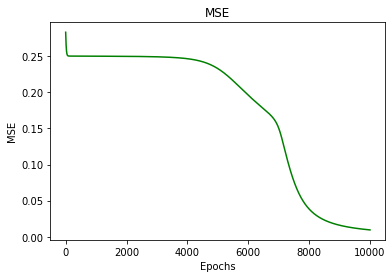

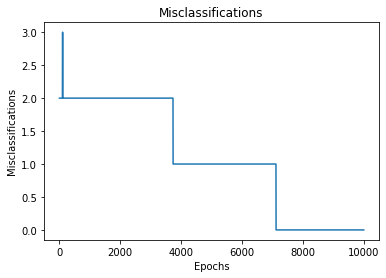

In [10]:
from matplotlib import pyplot as plt
from numpy import random

# a) Initializing weights to random values
weights = random.uniform(-1.0, 1.0, 9)
print("Initial weights", weights)

# b) Iterate
ro = 0.15 # learning rate
iterations, mses, misclasses = [],[],[]
for i in range(10000):
  iterations.append(i)
  mses.append(mse(weights))
  misclasses.append(misclassifications(weights))
  gradients = grdmse(weights)
  #print(i, "weights", weights)
  #print(i, "gradients", gradients)
  for j in range(9):
    weights[j] -= ro*gradients[j]

plt.plot(iterations, mses, 'g')
plt.title("MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

plt.plot(iterations, misclasses)
plt.title("Misclassifications")
plt.xlabel("Epochs")
plt.ylabel("Misclassifications")
plt.show()

Initial weights [ 0.6616562  -0.12187822 -0.60277779  0.77888301 -0.03650719 -0.64533842
  0.64615007  0.99687961  0.30178343]


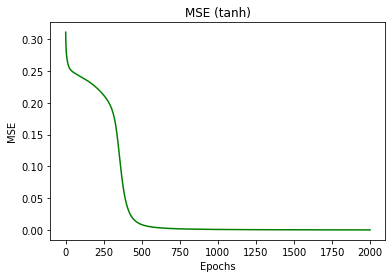

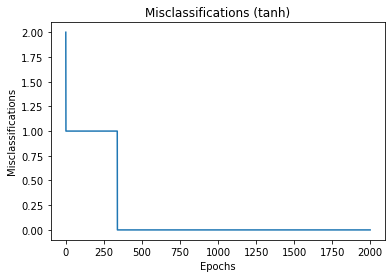

In [ ]:
# Trying the same thing with tanh activation function
from matplotlib import pyplot as plt
from numpy import random

# a) Initializing weights to random values
weights = random.uniform(-1.0, 1.0, 9)
print("Initial weights", weights)

# b) Iterate
ro = 0.15 # learning rate
iterations, mses, misclasses = [],[],[]
for i in range(2000):
  iterations.append(i)
  mses.append(mse(weights, activation="tanh"))
  misclasses.append(misclassifications(weights, activation="tanh"))
  gradients = grdmse(weights, activation="tanh")
  #print(i, "weights", weights)
  #print(i, "gradients", gradients)
  for j in range(9):
    weights[j] -= ro*gradients[j]

plt.plot(iterations, mses, 'g')
plt.title("MSE (tanh)")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

plt.plot(iterations, misclasses)
plt.title("Misclassifications (tanh)")
plt.xlabel("Epochs")
plt.ylabel("Misclassifications")
plt.show()

Initial weights [ 0.79970611 -0.25061475  0.68653527  0.08533759  0.23032128 -0.41476469
  0.30639639  0.91104175 -0.60282887]


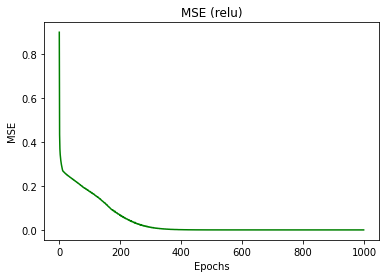

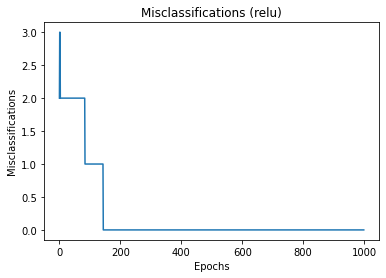

In [41]:
# Trying the same thing with relu activation function
from matplotlib import pyplot as plt
from numpy import random

# a) Initializing weights to random values
weights = random.uniform(-1.0, 1.0, 9)
print("Initial weights", weights)

# b) Iterate
ro = 0.1 # learning rate
iterations, mses, misclasses = [],[],[]
for i in range(1000):
  iterations.append(i)
  mses.append(mse(weights, activation="relu"))
  misclasses.append(misclassifications(weights, activation="relu"))
  gradients = grdmse(weights, activation="relu")
  #print(i, "weights", weights)
  #print(i, "gradients", gradients)
  for j in range(9):
    weights[j] -= ro*gradients[j]

plt.plot(iterations, mses, 'g')
plt.title("MSE (relu)")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

plt.plot(iterations, misclasses)
plt.title("Misclassifications (relu)")
plt.xlabel("Epochs")
plt.ylabel("Misclassifications")
plt.show()